#Problemas de la guía 5
## S. Schiavinato - LU 153/11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats #Contiene distribuciones útiles
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
%matplotlib inline
plt.rcParams["figure.figsize"] = (6 * (1 + np.sqrt(5)) / 2, 6)
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 20

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Datos para ambos problemas

In [2]:
σ = 0.3
X = np.array([2.00,2.10,2.20,2.30,2.40,2.50,2.60,2.70,2.80,2.90,3.00])
Y = np.array([2.78,3.29,3.29,3.33,3.23,3.69,3.46,3.87,3.62,3.40,3.99])

Ajustes por cuadrados mínimos

In [3]:
def cuadrados_minimos(X, Y, σY):
    N = X.size
    Δ = N * np.sum(X**2) - np.sum(X)**2
    A1 = (np.sum(X**2) * np.sum(Y) - np.sum(X) * np.sum(X*Y))/Δ
    A2 = (N * np.sum(X*Y) - np.sum(X) * np.sum(Y))/Δ
    Σ11 = σY**2 / Δ * np.sum(X**2)
    Σ22 = σY**2/ Δ * N
    Σ12 = σY**2/Δ * (-np.sum(X))
    a = np.array([A1, A2])
    cov = np.array([[Σ11, Σ12],[Σ12, Σ22]])
    return a, cov

##Problema 6 
### Graficar los datos y ajustar una recta, con las bandas de error (con y sin covarianza considerada)

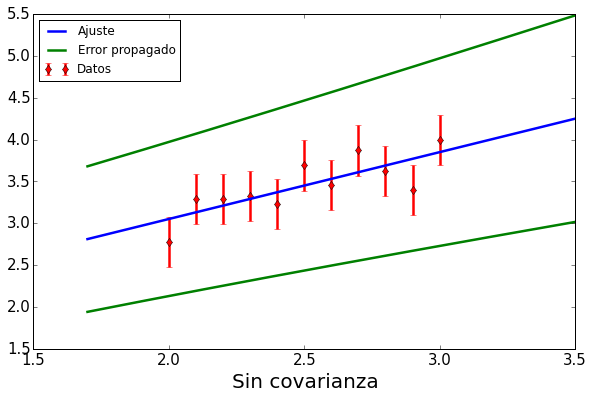

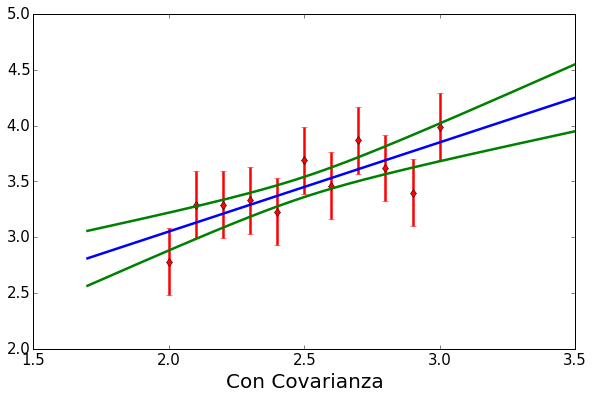

In [4]:
a, cov = cuadrados_minimos(X, Y, σ)

t = np.linspace(1.7, 3.5, 1000)
f = lambda x, a, b: a + b * x #Para ejecutarlo puedo usar f(t, *a) sii a es un lista o una tupla de dos elementos
#Funciones del error, con y sin covarianza
σYCov = lambda x, cov : np.sqrt(cov[0,0] + x**2 * cov[1,1] + 2 * x * cov[0,1])
σY = lambda x, cov : np.sqrt(cov[0,0] + x**2 * cov[1,1])

#Sin covarianza
plt.figure(1)
plt.errorbar(X,Y, yerr = σ, fmt = "rd", label = "Datos")
plt.plot(t,f(t, *a) + σY(t, cov), 'g-')
plt.plot(t, f(t, *a), 'b-', label = "Ajuste")
plt.plot(t, f(t, *a) - σY(t, cov), 'g-', label = "Error propagado");
plt.xlabel("Sin covarianza")
plt.legend(loc=0)

#Con covarianza
plt.figure(2)
plt.errorbar(X,Y, yerr = σ, fmt = "rd",  label = "Datos")
plt.plot(t,f(t, *a) + σYCov(t, cov), 'g-', label = "Error propagado")
plt.plot(t, f(t, *a), 'b-', label = "Ajuste")
plt.plot(t, f(t, *a) - σYCov(t, cov), 'g-');
plt.xlabel("Con Covarianza");

##Problema 7
### A partir de las rectas ajustadas, generar números al azar respecto al ajuste con distribución normal.

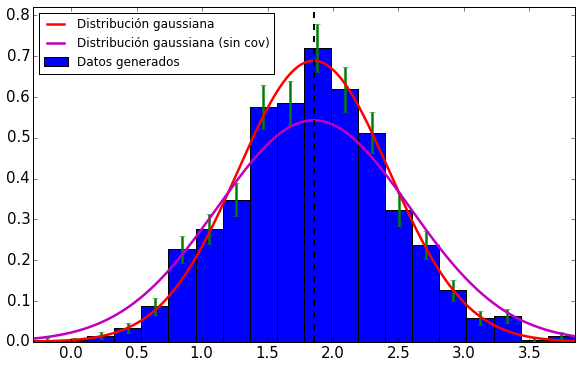

In [5]:
@interact(ya = (0.5, 4, 0.05)) #Código interactivo en IPython Notebook > v2
def G5_E7(ya = 0.5):
    A = []
    N = 1000 #Cantidad de cuentas
    a, cov = cuadrados_minimos(X, Y, σ) #Calculo los parámetros, para ingresar al generador de numeros aleatorios
    for i in range(N):
        Yr = []

        #Acá hay una diferencia. El enunciado pide efectuar el siguiente código 
        for i in np.nditer(X): #Creo un array Yr con valores aleatorios normales para cada x del vector X
            #La población es N(mu = a + b *x; sigma = σ), elemento 0 del ndarray
            Yr.append(np.random.normal(f(i, *a), σ, 1)[0])
    
        #Personalmente creo que lo que deberíamos hacer es
        #for i in nd.nditer(Y)
            #Yr.append(np.random.normal(i, σ, 1)[0])
        #Ya que de esta forma encontraría valores "experimentales" nuevos, consistente 
        #con los valores experimentales originales y a partir de ellos encontraría el ajuste 
        #y luego el valor interpolado. 
        #Con eso podría además encontrar numéricamente el intervalor de confianza
        
        Yr = np.array(Yr) #Transformo a array, tiene métodos útiles
        
        #Uso cuadrado mínimos con los datos aleatorios y obtengo una nueva recta
        ar, covr = cuadrados_minimos(X, Yr, σ) 
        A.append(f(ya, *ar)) #Guardo en un vector el valor predicho por el ajuste
        
    A = np.array(A)
    #Genero el histograma de los datos
    hist, bins = np.histogram(A, bins = 20)
    yerr = np.sqrt(hist) / (np.diff(bins) * hist.sum())
    hist = hist / (hist.sum() * np.diff(bins))
    plt.bar(bins[:-1], hist, width = np.diff(bins), yerr = yerr, ecolor = "g", label = "Datos generados") 
    t = np.linspace(np.amin(A), np.amax(A), 1000) #Creo el vector t para graficar la gaussiana acorde
    #La gaussiana debe tener la varianza igual al sigma propagado para y(x)
    plt.plot(t, stats.norm(f(ya, *a),σYCov(ya, cov)).pdf(t), 'r-', label = "Distribución gaussiana")
    #Para comparar, graficamos la covarianza
    plt.plot(t, stats.norm(f(ya, *a), σY(ya, cov)).pdf(t), 'm-', label = "Distribución gaussiana (sin cov)")
    #Además ponemos una línea con el valor medio
    plt.axvline(f(ya, *a), color = "k", linestyle = "--", linewidth = 2)
    plt.legend(loc=0);
    plt.xlim((bins.min(),bins.max()))
    plt.ylim((0, hist.max() + 0.1))